# Overview             
<!--  -->            
This notebook is about **Flight Delay** dataset and i have done          
* 1.data wrangling             
* 2.Feature Creation           
* 2.Exploratory Data Analysis(EDA)         

**Feature Description**           
* MONTH: Month         
* DAY_OF_WEEK:day of week        
* DEP_DEL15_GROUP:**TARGET** Binary of a departure delay over 15 minutes(1 is yes)             
* DISTANCE_GROUP:Distance group to be flown by departing aircraft        
* DEP_BLOCK:Departure block         
* SEGMENT_NUMBER:The segment that this tail number is on for the day         
* CONCURRENT_FLIGHT:Concurrent flights leaving from the airport in the same departure block           
* NUMBER_OF_SEATS: number of seats in the aircraft          
* CARRIER_NAME:Carrier                    
* AIRPRT_FLIGHT_MONTH:avg Airport Flights per Month           
* AIRLINE_FLIGHT_MONTH:avg Airlinr Flights per Month        
* AIRLINE_AIRPORT_FLIGHT_MONTH: avg flights per month for Airline and Airport        
* AVG_MONTHLY_PASS_AIRPORT:avg passengers for the departing airport for the month           
* AVG_MONTHLY_PASS_AIRLINE:avg passengers for the airline for the month           
* FLT_ATTENDANTS_PER_PASS:flight attendants per passengers for airline              
* GROUND_SERVE_PER_PASS:Ground service employees per passengers for airline            
* PLANE_AGE:Age of departing aircraft             
* DEPARTING_AIRPORT:Departing airport          
* LATTITUDE:Lattitude of departing airport        
* LONGITUDE:Longitude of departing airport              
* PREVOIUS_AIRPORT: Previous airport that aircraft departed from             
* SNOW:inches of snowfall for the day          
* SNWD:inches of snow on the ground for the day          
* TMAX:Max temperature for the day          
* AWND:Max wind speed for the day

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd/users/prave/datasets/csv files/competition/flight delay

C:\users\prave\datasets\csv files\competition\flight delay


In [3]:
df=pd.read_csv('participants_dataset_DES.csv')
sub=pd.read_csv('submission_sample.csv')

# Exploring Dataset

In [4]:
df.shape

(200000, 28)

In [5]:
print("dataset contain {} rows".format(df.shape[0]))
print("dataset contains {} columns".format(df.shape[1]))

dataset contain 200000 rows
dataset contains 28 columns


In [6]:
columns=['airplane_id','year','month','day_of_week','dep_del15','dep_time_blk','distance_group','segment_number',
         'concurrent_flights','number_of_seats','carrier_name','airport_flights_month','airline_flights_month',
        'airline_airport_flights_month','avg_monthly_pass_airport','avg_monthly_pass_airline','flt_attendants_per_pass',
        'ground_serv_per_pass','plane_age','departing_airport','latitude','longitude','previous_airport','prcp','snow',
         'snwd','tmax','awnd']
df.columns=columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   airplane_id                    200000 non-null  int64  
 1   year                           160000 non-null  float64
 2   month                          160000 non-null  float64
 3   day_of_week                    200000 non-null  int64  
 4   dep_del15                      200000 non-null  int64  
 5   dep_time_blk                   200000 non-null  object 
 6   distance_group                 160000 non-null  float64
 7   segment_number                 160000 non-null  float64
 8   concurrent_flights             160000 non-null  float64
 9   number_of_seats                160000 non-null  float64
 10  carrier_name                   200000 non-null  object 
 11  airport_flights_month          160000 non-null  float64
 12  airline_flights_month         

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
airplane_id,200000.0,3.102104e+05,1.732786e+05,10001.000000,1.599122e+05,3.105585e+05,4.608755e+05,6.099970e+05
year,160000.0,2.020000e+03,0.000000e+00,2020.000000,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
month,160000.0,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
day_of_week,200000.0,4.002285e+00,1.741150e+00,1.000000,3.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00
dep_del15,200000.0,1.831550e-01,3.867945e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
distance_group,160000.0,3.908119e+00,2.262299e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01
segment_number,160000.0,3.020875e+00,1.662605e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
concurrent_flights,160000.0,2.577416e+01,1.847759e+01,1.000000,1.000000e+01,2.200000e+01,3.600000e+01,9.000000e+01
number_of_seats,160000.0,1.310307e+02,4.624470e+01,44.000000,7.600000e+01,1.430000e+02,1.640000e+02,3.220000e+02
airport_flights_month,160000.0,1.238481e+04,7.879166e+03,1141.000000,5.400000e+03,1.091900e+04,1.761100e+04,3.084200e+04


In [9]:
df.isna().sum().sort_values(ascending=False)

avg_monthly_pass_airport         40000
airline_flights_month            40000
tmax                             40000
snwd                             40000
snow                             40000
prcp                             40000
plane_age                        40000
ground_serv_per_pass             40000
flt_attendants_per_pass          40000
avg_monthly_pass_airline         40000
year                             40000
airline_airport_flights_month    40000
awnd                             40000
airport_flights_month            40000
number_of_seats                  40000
concurrent_flights               40000
segment_number                   40000
distance_group                   40000
month                            40000
carrier_name                         0
departing_airport                    0
latitude                             0
longitude                            0
previous_airport                     0
dep_time_blk                         0
dep_del15                

# Exploratory Data Analysis & Data Cleaning           
<!--  -->               
* Handling Nan/Missing values           
* Plotting boxplots,countplots and distribution for numerical and categorical features respectively.          
* Removing outliers           

In [10]:
# Impute Nan values

def impute_nanvalues(column,df):
    df[column]=df[column].fillna(method='bfill')
impute_nanvalues('distance_group',df)
impute_nanvalues('segment_number',df)
impute_nanvalues('concurrent_flights',df)
impute_nanvalues('airport_flights_month',df)
impute_nanvalues('airline_flights_month',df)
impute_nanvalues('flt_attendants_per_pass',df)
impute_nanvalues('airline_airport_flights_month',df)
impute_nanvalues('avg_monthly_pass_airport',df)
impute_nanvalues('avg_monthly_pass_airline',df)
impute_nanvalues('ground_serv_per_pass',df)
impute_nanvalues('plane_age',df)
impute_nanvalues('snwd',df)
impute_nanvalues('awnd',df)
impute_nanvalues('tmax',df)
impute_nanvalues('number_of_seats',df)
impute_nanvalues('snow',df)
impute_nanvalues('prcp',df)

In [11]:
# Impute "year" nan values
df['year'].fillna(value=2020.0,inplace=True)

In [12]:
# impute "month" nan values
df['month'].fillna(value=1.0,inplace=True)

In [13]:
# Impute nan values using "mode" 
df['number_of_seats'].fillna(df['number_of_seats'].mode()[0],inplace=True)
df['snwd'].fillna(df['snwd'].mode()[0],inplace=True)
df['ground_serv_per_pass'].fillna(df['ground_serv_per_pass'].mode()[0],inplace=True)
df['tmax'].fillna(df['tmax'].mode()[0],inplace=True)
df['avg_monthly_pass_airline'].fillna(df['avg_monthly_pass_airline'].mode()[0],inplace=True)
df['snow'].fillna(df['snow'].mode()[0],inplace=True)
df['prcp'].fillna(df['prcp'].mode()[0],inplace=True)

In [14]:
q=df.drop(['airplane_id','year','month','dep_del15'],axis=1)
numeric_variable=[i for i in q.columns if df[i].dtype!='O']
len(numeric_variable)

20

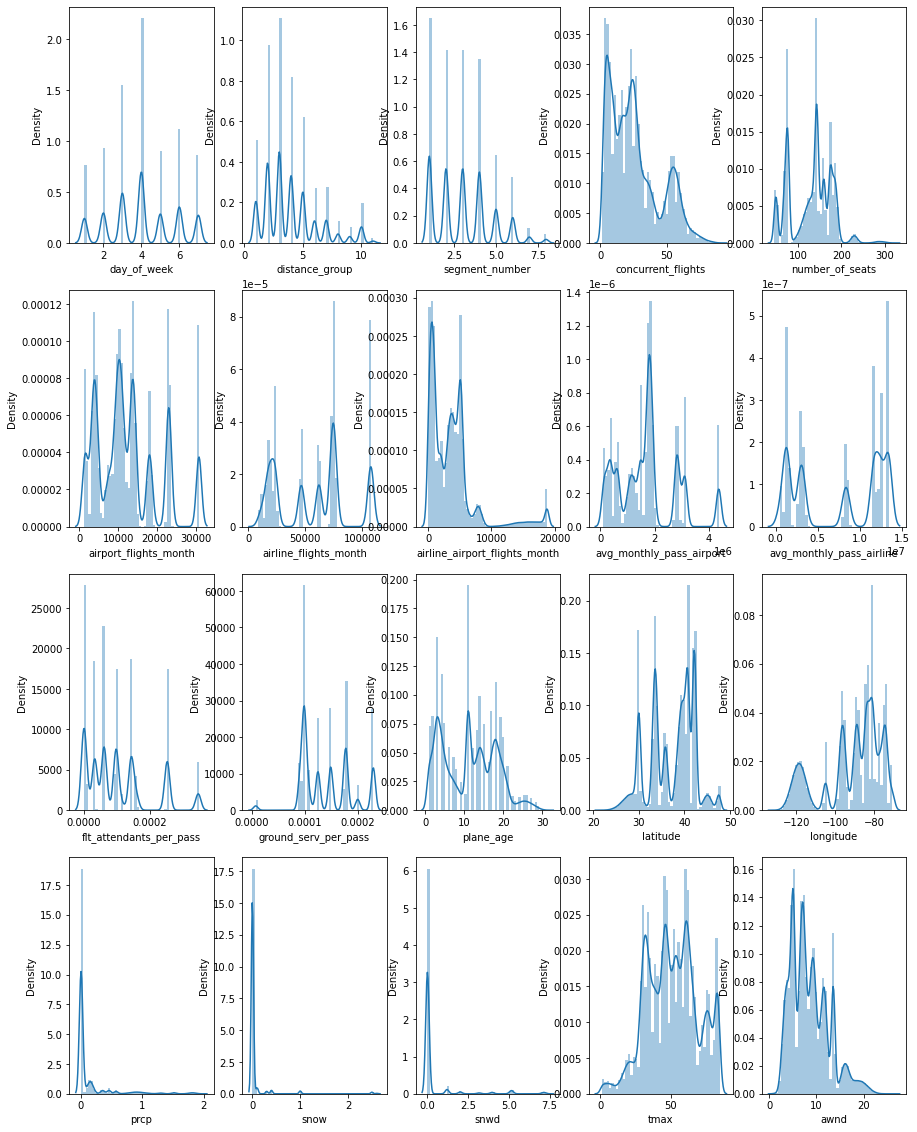

In [15]:
# Distribution plots for numeric_variable
plt.figure(figsize=[15,20])
for i in range(20):
    plt.subplot(4,5,(i%25)+1)
    sns.distplot(df[numeric_variable[i]])
plt.show()

* The Distribution plot of all variables seems **Normal** 

<AxesSubplot:xlabel='dep_del15', ylabel='count'>

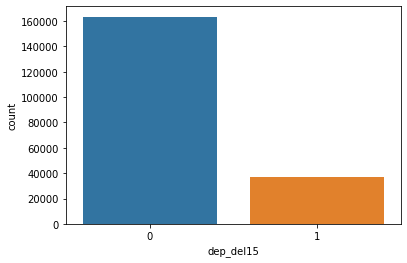

In [16]:
# Target Variable Distribution
sns.countplot(df['dep_del15'])

* From our dataset **80%** data points are **0(Not Delay)**            
* And **20%** data points are **1(Delay)**

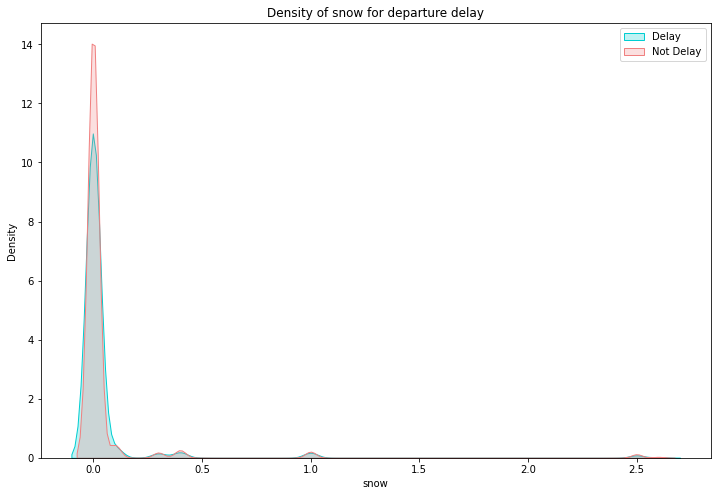

In [17]:
# snow distribution with "dep_del15" ariable
plt.figure(figsize=[12,8])
sns.kdeplot(df['snow'][df.dep_del15==1],color='darkturquoise',shade=True)
sns.kdeplot(df['snow'][df.dep_del15==0],color='lightcoral',shade=True)
plt.legend(['Delay','Not Delay'])
plt.title('Density of snow for departure delay')
plt.xlabel('snow')
plt.show()

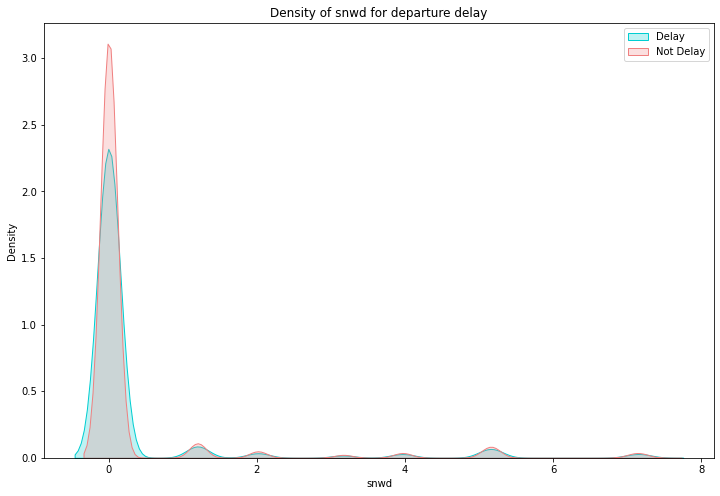

In [18]:
plt.figure(figsize=[12,8])
sns.kdeplot(df['snwd'][df.dep_del15==1],color='darkturquoise',shade=True)
sns.kdeplot(df['snwd'][df.dep_del15==0],color='lightcoral',shade=True)
plt.legend(['Delay','Not Delay'])
plt.title('Density of snwd for departure delay')
plt.xlabel('snwd')
plt.show()

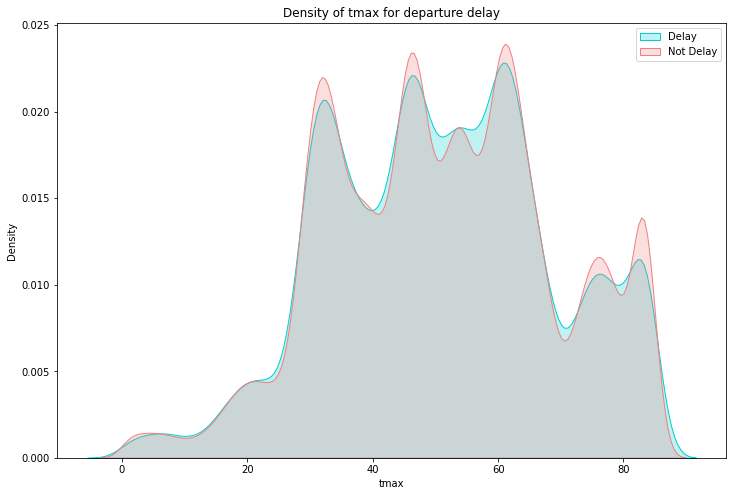

In [19]:
plt.figure(figsize=[12,8])
sns.kdeplot(df['tmax'][df.dep_del15==1],color='darkturquoise',shade=True)
sns.kdeplot(df['tmax'][df.dep_del15==0],color='lightcoral',shade=True)
plt.legend(['Delay','Not Delay'])
plt.title('Density of tmax for departure delay')
plt.xlabel('tmax')
plt.show()

* The "TMax" variable distributed equally to dep_del15(**0 and 1**)

In [20]:
# which "day_of_week" has highest delay?
week=df[['dep_del15','day_of_week']].groupby('day_of_week').sum().sort_values('dep_del15',ascending=False)
week['percentual']=week['dep_del15']/(week['dep_del15'].sum())*100
week

,dep_del15,percentual
day_of_week,,
4,9690,26.453004
3,6826,18.634490
6,4898,13.371188
2,4144,11.312822
5,3998,10.914253
7,3803,10.381917
1,3272,8.932325


* Day of week **4(Wednesday)** has highest departure delay         
* Day of week **1(Sunday)** has least departure delay

In [21]:
# Amount of delay within a "dep_time_blk"?
time_blk=df[['dep_del15','dep_time_blk']].groupby('dep_time_blk').sum().sort_values('dep_del15',ascending=False)
time_blk['percentual']=time_blk['dep_del15']/(time_blk['dep_del15'].sum())*100
time_blk

,dep_del15,percentual
dep_time_blk,,
0700-0759,3265,8.913216
0800-0859,2858,7.802135
1700-1759,2759,7.531872
1800-1859,2731,7.455434
0900-0959,2585,7.056864
1200-1259,2304,6.289755
1000-1059,2299,6.276105
1100-1159,2233,6.095930
1600-1659,2155,5.882995


* Most delays occur between **7:00 AM** to **7:59 AM**,in the morning

In [22]:
# which "distance_group" has most delay?
distance=df[['distance_group','dep_del15']].groupby('distance_group').sum().sort_values('dep_del15',ascending=False)
distance['percentual']=distance['dep_del15']/(distance['dep_del15'].sum())*100
distance

,dep_del15,percentual
distance_group,,
3.0,8142,22.227075
2.0,7214,19.693702
4.0,5948,16.237613
5.0,4507,12.303786
1.0,3747,10.229041
7.0,2058,5.618192
6.0,1990,5.432557
10.0,1461,3.988425
8.0,817,2.230351


* distnace_group **3.0** has highest delay.           

In [23]:
# which "segment_number" has highest delay?
segment=df[['segment_number','dep_del15']].groupby('segment_number').sum().sort_values('dep_del15',ascending=False)
segment['percentual']=segment['dep_del15']/(segment['dep_del15'].sum())*100
segment

,dep_del15,percentual
segment_number,,
1.0,8456,23.084273
2.0,7284,19.884797
3.0,7273,19.854768
4.0,6865,18.740957
5.0,3324,9.074281
6.0,2492,6.802981
7.0,573,1.564249
8.0,364,0.993694


* segment_number **1.0** has highest delay        
* And as you can see that,as segment_number increased **delay decreased**

In [24]:
# which carrier has most delay?
carrier=df[['carrier_name','dep_del15']].groupby('carrier_name').sum().sort_values('dep_del15',ascending=False)
carrier['percentual']=carrier['dep_del15']/(carrier['dep_del15'].sum())*100
carrier

,dep_del15,percentual
carrier_name,,
Southwest Airlines Co.,6398,17.466081
American Airlines Inc.,5331,14.553247
Delta Air Lines Inc.,4846,13.229232
United Air Lines Inc.,4552,12.426633
SkyWest Airlines Inc.,2892,7.894952
"Midwest Airline, Inc.",2308,6.300674
JetBlue Airways,1668,4.553520
Mesa Airlines Inc.,1532,4.182250
Atlantic Southeast Airlines,1345,3.671753


* **Southwest Airlines Co.** carrier has highest number of delay.       
* And  **Hawaiian Airlines Inc.** carrier has least number of delay.

In [25]:
plane_age=df[['plane_age','dep_del15']].groupby('plane_age').sum().sort_values('dep_del15',ascending=False)
plane_age['percentual']=plane_age['dep_del15']/(plane_age['dep_del15'].sum())*100
plane_age

,dep_del15,percentual
plane_age,,
11.0,4368,11.924326
3.0,3216,8.779449
4.0,2552,6.966777
18.0,2395,6.538178
14.0,2158,5.891185
17.0,1950,5.323360
19.0,1756,4.793754
2.0,1740,4.750075
15.0,1690,4.613579


* Plane_age **11.0** has highest departure delay          
* Plane_age does not have a big impact on departure delay            
* the reason would be other like security problem,arrival delay etc..

In [26]:
# which "departing_airport" has most delay ?
depart=df[['departing_airport','dep_del15']].groupby('departing_airport').sum().sort_values('dep_del15',ascending=False)
depart['percentual']=depart['dep_del15']/(depart['dep_del15'].sum())*100
depart

,dep_del15,percentual
departing_airport,,
Houston Intercontinental,3622,9.887800
Chicago O'Hare International,3016,8.233463
Detroit Metro Wayne County,2444,6.671945
Atlanta Municipal,1939,5.293331
Douglas Municipal,1612,4.400644
...,...,...
El Paso International,3,0.008190
Des Moines Municipal,3,0.008190
Tulsa International,3,0.008190


* **Houstan International** departing_airport has highest delay       

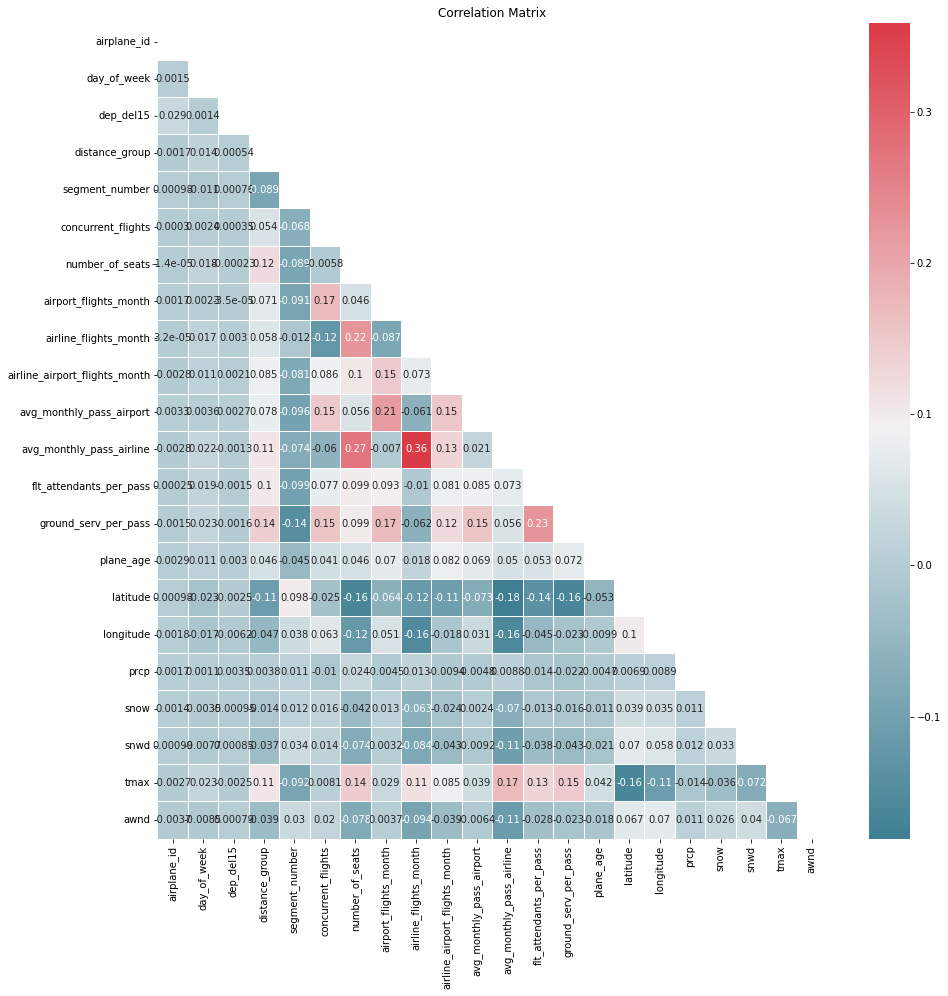

In [27]:
# Correlation matrix
cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=[15,15])
corr=df.drop(['year','month'],axis=1).corr()              

# Generate a mask for the upper triangle
mask=np.triu(np.ones_like(corr,dtype=np.bool))

g=sns.heatmap(corr,annot=True,mask=mask,cmap=cmap,linewidth=0.5)
p=plt.title('Correlation Matrix')

# Feature Engineering                    
<!--  -->            
* Creting new feature from the existing features                
* Handling ordinal and nominal categorical features              
* Feature Selection   

### Creating new Features           
* **Date:** 

In [28]:
# create "date" feature using yer,month variables
df['date']= df['year'].astype(int).astype(str) + "-" + df['month'].astype(int).astype(str) + "-" + df['day_of_week'].astype(str)

In [29]:
def low_time(x):
    if x=='0600-0659':
        return '0600'
    elif x=='0700-0759':
        return '0700'
    elif x=='0800-0859':
        return '0800'
    elif x=='0900-0959':
        return '0900'
    elif x=='1000-1059':
        return '1000'
    elif x=='1100-1159':
        return '1100'
    elif x=='1200-1259':
        return '1200'
    elif x=='1300-1359':
        return '1300'
    elif x=='1400-1459':
        return '1400'
    elif x=='1500-1559':
        return '1500'
    elif x=='1600-1659':
        return '1600'
    elif x=='1700-1759':
        return '1700'
    elif x=='1800-1859':
        return '1800'
    elif x=='1900-1959':
        return '1900'
    elif x=='2000-2059':
        return '2000'
    elif x=='2100-2159':
        return '2100'
    elif x=='2200-2259':
        return '2200'
    elif x=='2300-2359':
        return '2300'
    elif x=='0001-0559':
        return '0001'

In [30]:
# create "low" variable using dep_time_blk variable
df['low']=df['dep_time_blk'].apply(low_time)

In [31]:
def high_time(x):
    if x=='0600-0659':
        return '0659'
    elif x=='0700-0759':
        return '0759'
    elif x=='0800-0859':
        return '0859'
    elif x=='0900-0959':
        return '0959'
    elif x=='1000-1059':
        return '1059'
    elif x=='1100-1159':
        return '1159'
    elif x=='1200-1259':
        return '1259'
    elif x=='1300-1359':
        return '1359'
    elif x=='1400-1459':
        return '1459'
    elif x=='1500-1559':
        return '1559'
    elif x=='1600-1659':
        return '1659'
    elif x=='1700-1759':
        return '1759'
    elif x=='1800-1859':
        return '1859'
    elif x=='1900-1959':
        return '1959'
    elif x=='2000-2059':
        return '2059'
    elif x=='2100-2159':
        return '2159'
    elif x=='2200-2259':
        return '2259'
    elif x=='2300-2359':
        return '2359'
    elif x=='0001-0559':
        return '0559'

In [32]:
# create "high" variable using dep_time_blk variable
df['high']=df['dep_time_blk'].apply(high_time)

In [33]:
# create "timestamp" variable using date and low features
df['timestamp']=pd.to_datetime(df['date'].astype('str') + ' ' + df['low'].astype('str'))

In [34]:
# create "prcp_snow_ratio" varible with prcp and snow features
from itertools import combinations
for a,b in combinations(df[['prcp','snow']],2):
    df[f'{a}_{b}_ratio']=df[a].div(df[b])

In [35]:
# create "plane_age_airline_airport_flights_month" variable with plane_age and airline_airport_flights_month features
for a,b in combinations(df[['plane_age','airline_airport_flights_month']],2):
    df[f'{a}_{b}_ratio']=df[a].div(df[b])

In [36]:
# finding ratio with number_of_seats and cocurrent_flight
for a,b in combinations(df[['number_of_seats','concurrent_flights']],2):
    df['seat_distribution']=df[a].div(df[b])

In [37]:
# Normalise seat_distribution feature
df['seat_distribution_normalise']=(df['seat_distribution']-df['seat_distribution'].mean())/df['seat_distribution'].std()

In [38]:
# create "wind_chill" variable using tmax,awnd variables
for temp,wind in combinations(df[['tmax','awnd']],2):
    df['wind_chill']=13.12+(.6215*df[temp])-(11.37*df[wind]**0.16)+(.3965*df[temp]*df[wind]**0.16)

In [39]:
df.isna().sum().sort_values(ascending=False)[:5]

prcp_snow_ratio     123782
airplane_id              0
awnd                     0
longitude                0
previous_airport         0
dtype: int64

In [40]:
df['prcp_snow_ratio'].replace([np.inf,-np.inf],np.nan,inplace=True)
df['prcp_snow_ratio'].fillna(method='bfill',inplace=True)

In [41]:
df['prcp_snow_ratio'].fillna(df['prcp_snow_ratio'].median(),inplace=True)

In [42]:
# convert 'str' to 'int'
df['low']=df['low'].astype('int64')
df['high']=df['high'].astype('int64')

In [43]:
# Feature Encoding

from sklearn.preprocessing import LabelEncoder

def enc(x):
    le=LabelEncoder()
    df[x]=le.fit_transform(df[x])
labels=['carrier_name','previous_airport','departing_airport','dep_time_blk']
for i in labels:
    enc(i)

**Feature Selection**                       

In [44]:
X=df.drop(['dep_del15','date','timestamp','airplane_id'],axis=1)
y=df['dep_del15']

In [45]:
from sklearn.feature_selection import SelectKBest
fs=SelectKBest(k='all')
fs.fit(X,y)

SelectKBest(k='all')

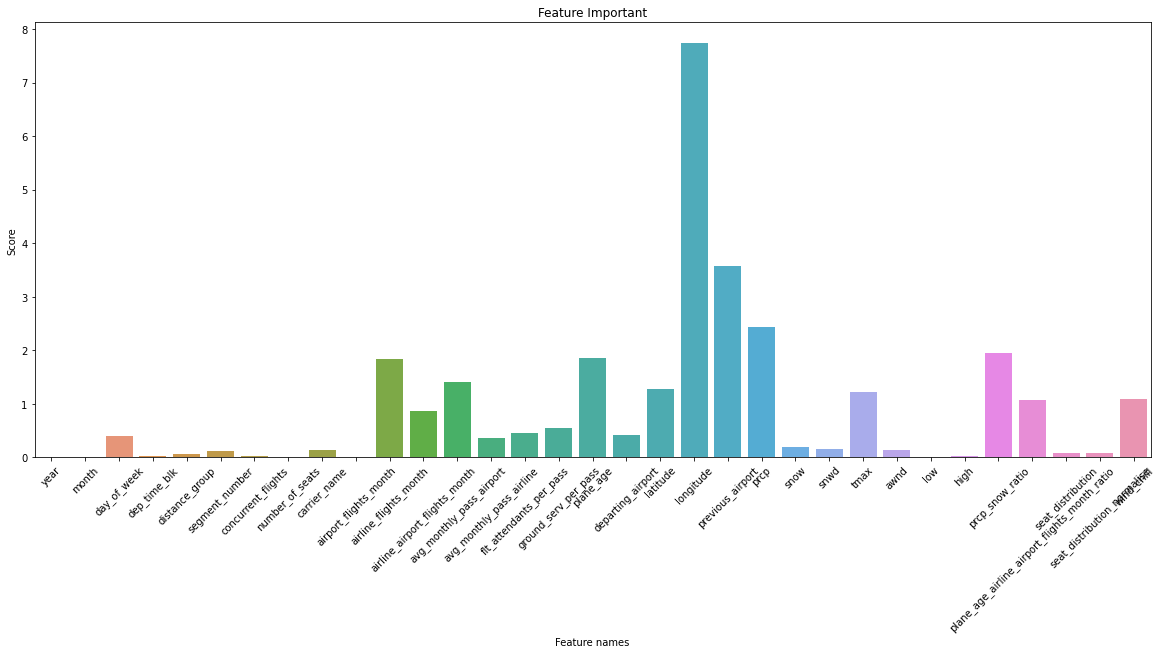

In [46]:
plt.figure(figsize=(20,8))
g=sns.barplot(x=X.columns,y=fs.scores_)
p=plt.title("Feature Important")
p=plt.xlabel('Feature names')
p=plt.ylabel('Score')
p=g.set_xticklabels(g.get_xticklabels(),rotation=45)

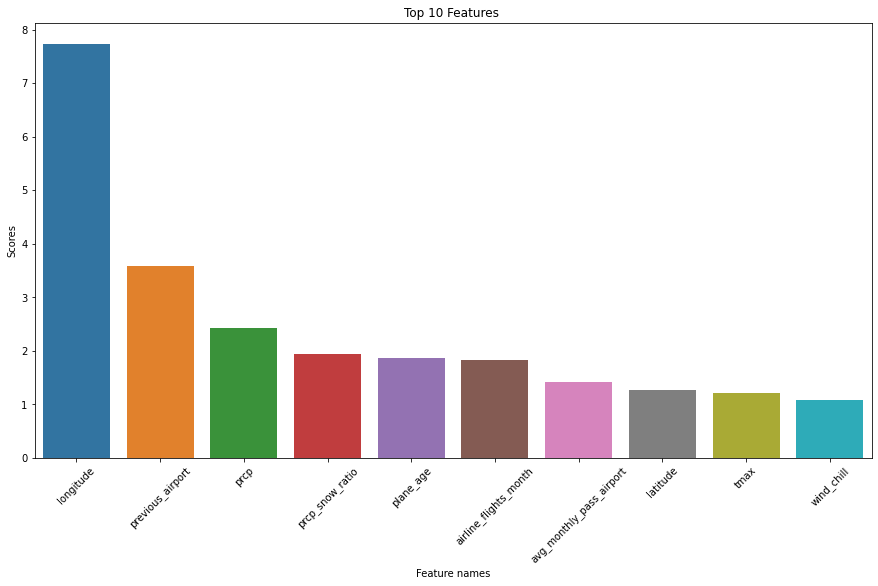

In [47]:
feature_imp=pd.DataFrame(fs.scores_,columns=['Score'],index=X.columns)
top10_feature=feature_imp.nlargest(n=10,columns=['Score'])

plt.figure(figsize=[15,8])
g=sns.barplot(x=top10_feature.index,y=top10_feature['Score'])
p=plt.title('Top 10 Features ')
p=plt.xlabel('Feature names')
p=plt.ylabel('Scores')
p=g.set_xticklabels(g.get_xticklabels(),rotation=45)

In [48]:
my_submission=pd.DataFrame({'DATE':df.date,"LOW":df.low,"HIGH":df.high,"TIMESTAMP":df.timestamp,"PRCP_SNOW_RATIO":df.prcp_snow_ratio,
                           "PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO":df.plane_age_airline_airport_flights_month_ratio,
                           "SEAT_DISTRIBUTION":df.seat_distribution,"SEAT_DISTRIBUTION_NORMALISED":df.seat_distribution_normalise,
                           'WIND_CHILL':df.wind_chill})
my_submission.to_csv('submission_sample.csv',index=False)